# Machine Learning 
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices
- Welcome to My first project of  Machine Learning 


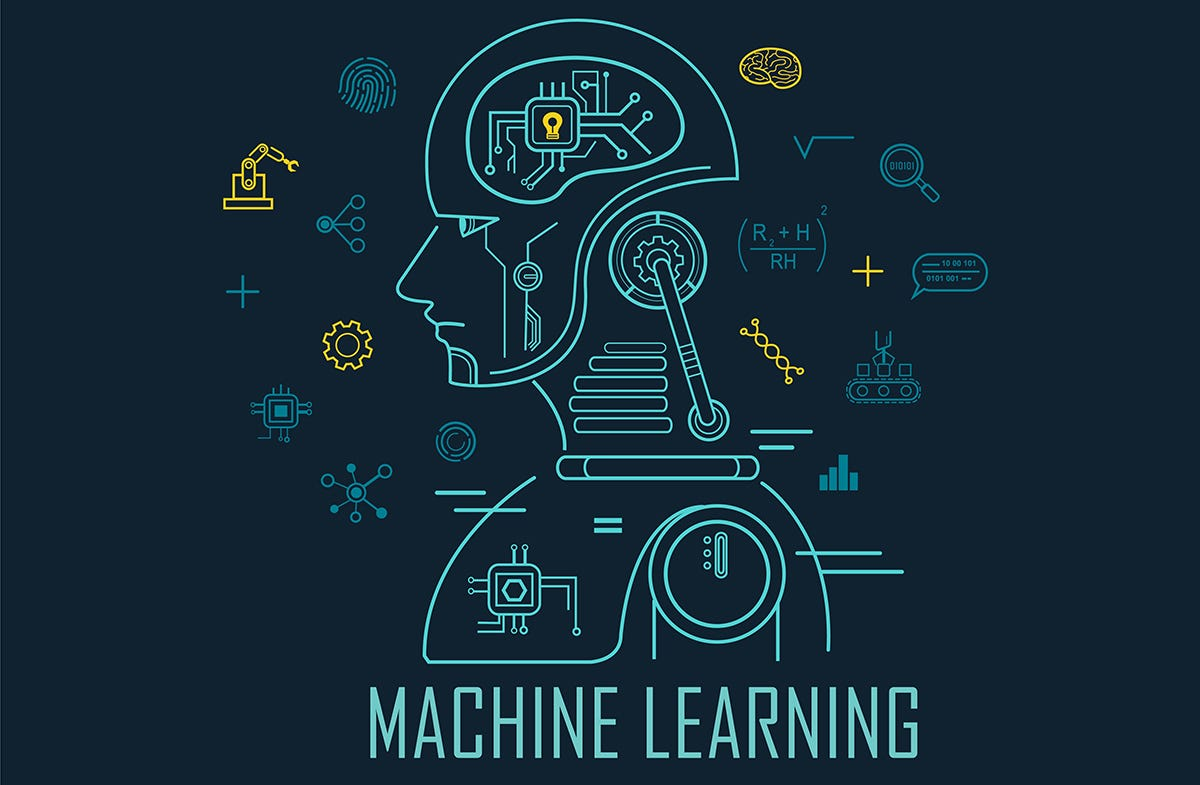

In [83]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit
import warnings


#### read the data saved on the same location and display it 

In [57]:

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')

- Display Data 

In [58]:
data 

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


* gathering all information about dataset
*  type of all data
* shape of the data
* read the statistics of this data
* read the statistic of the MEDV feature and see if they are any outliers or missing values

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [60]:
#1- type of all data
print(data.dtypes)

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object


In [61]:
# print the shape of your data
data.shape

(489, 4)

In [62]:
# display the basic statistics
data.describe() 

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


* In the code below I assign new variable for the prediction column and drop it from original dataset
* I assigne the prediction column as a 'price' and other column as a features data

In [63]:
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
# print the shape of the data
print('Boston housing dataset has {0} data points with {1} variables each.'.format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [64]:
prices.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

In [65]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


## Data Exploration


**the main goal** of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**.
* The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point.
*  The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
***
***


* Claculate **the statistics** for the code below
* Get **the minimum**  and **the max** of the price data
* Get **the mean**
* Get **the median**
* Get **the mode**
* Calculate **the std**
* Need to print **the data** 

In [66]:
# Minimum price of the data
minimum_price = prices.min()

In [67]:
# Maximum price of the data
maximum_price = prices.max()

In [68]:
# Mean price of the data
mean_price = prices.mean()

In [69]:

# Median price of the data
median_price = prices.median()

In [70]:
# Standard deviation of prices of the data
std_price = prices.std()

In [71]:
# Show the calculated statistics
print("Statistics for Boston housing dataset:")

print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:
Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average **number of rooms** among homes in the neighborhood.
- `'LSTAT'` is **the percentage of homeowners** in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is **the ratio of students to teachers** in primary and secondary schools in the neighborhood.


for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? **Justify your answer for each.**


#### **RM (Average Number of Rooms):**

    An increase in the average number of rooms generally  increase in the median home value (MEDV).
    Justification: Larger homes with more rooms are typically more desirable and costly, leading to a higher median home value.

#### **LSTAT (Percentage of Lower-Class Homeowners):**
    An increase in LSTAT generally decrease in MEDV.
    Justification: Neighborhoods with a higher percentage of lower-class homeowners often have lower property values .

#### **PTRATIO (Student-to-Teacher Ratio):**

    An increase in the student-to-teacher ratio generally correlates with a decrease in MEDV.
    Justification: A higher student-to-teacher ratio implies larger class sizes and potentially lower-quality education, which may make a neighborhood less attractive and reduce property values.

----

## Developing a Model
- In this second section of the project, I will develop the tools and techniques necessary for a model to make a prediction. 

*****************************
**************************

## **R2 Score**

### Implementation: Define a Performance Metric

- It is difficult to measure the quality of a given model without quantifying its **performance over training and testing**.

- This is typically done using some type of **performance metric**, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement.

-  For this project, I will  calculate the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify model's performance.


-  The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 
******************************************


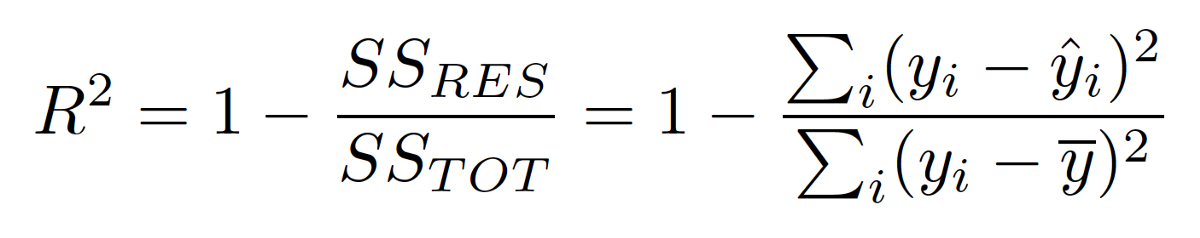

- The values for **R<sup>2</sup>** range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. 

- A model with an **R<sup>2</sup>** of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. 

- Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. 

- A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable.

******************************************

In [72]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_test, y_predict):
    """ Calculates and returns the performance score between 
        test and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_test' and 'y_predict'
    score = r2_score(y_test, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :--------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0|
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

# Performance_Metric

In [73]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R2, of {:.4f}.".format(score))

Model has a coefficient of determination, R2, of 0.9229.


### **Question:**
- Would you consider this model to have successfully captured the variation of the target variable? 
- Why or why not? 

### **Answer:**
- Yes, this model has successfully captured the variation of the target variable.
- **Justification**:
An R² value of 0.9229 indicates that 92.29% of the variance in the target variable is explained by the model. This is a high percentage, demonstrating that the model has a strong predictive capability.


------------------------------------------------
### Implementation: Shuffle and Split Data
- take the Boston housing dataset and split the data into training and testing subsets.
-  Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
- Split the data into 80% training and 20% testing.
- Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [74]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### **Question 3 - Training and Testing**

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

### **Answer**:  
- Splitting a dataset into training and testing subsets is a critical step in evaluating the performance of a learning algorithm.  
#### **Detect Overfitting and Underfitting**  
- A good performance on the training set but poor performance on the testing set indicates **overfitting**.  
- A poor performance on both sets suggests **underfitting**.  
Splitting helps identify these issues and guides model tuning.

----
## Analyzing Model Performance

- In this **third** section of the project, I'll take a look at several models' **learning and testing performances** on various subsets of training data. Additionally, I'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. **Graphing model's performance** based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a **decision tree model** with different maximum depths. Each graph visualizes the learning curves of the model for both **training and testing** as the size of the training set is increased. Note that the shaded region of a **learning curve** denotes the uncertainty of that curve (measured as the standard deviation).The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.

In [75]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeRegressor

# Suppress matplotlib user warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

def ModelLearning(X, y):
    """Calculates the performance of several models with varying sizes of training data.
       The learning and testing scores for each model are then plotted."""
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0] * 0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig, axes = plt.subplots(2, 2, figsize=(10, 7))

    # Create four different models based on max_depth
    for k, depth in enumerate([1, 3, 6, 10]):
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth=depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(
            regressor, X, y, cv=cv, train_sizes=train_sizes, scoring='r2'
        )
        
        # Find the mean and standard deviation for smoothing
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Subplot the learning curve 
        ax = axes[k//2, k%2]
        ax.plot(sizes, train_mean, 'o-', color='r', label='Training Score')
        ax.plot(sizes, test_mean, 'o-', color='g', label='Testing Score')
        ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
        ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
        
        # Labels
        ax.set_title(f'max_depth = {depth}')
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0] * 0.8])
        ax.set_ylim([-0.05, 1.05])
        ax.legend(loc='lower right')
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=16, y=1.03)
    fig.tight_layout()
    plt.show()



C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p

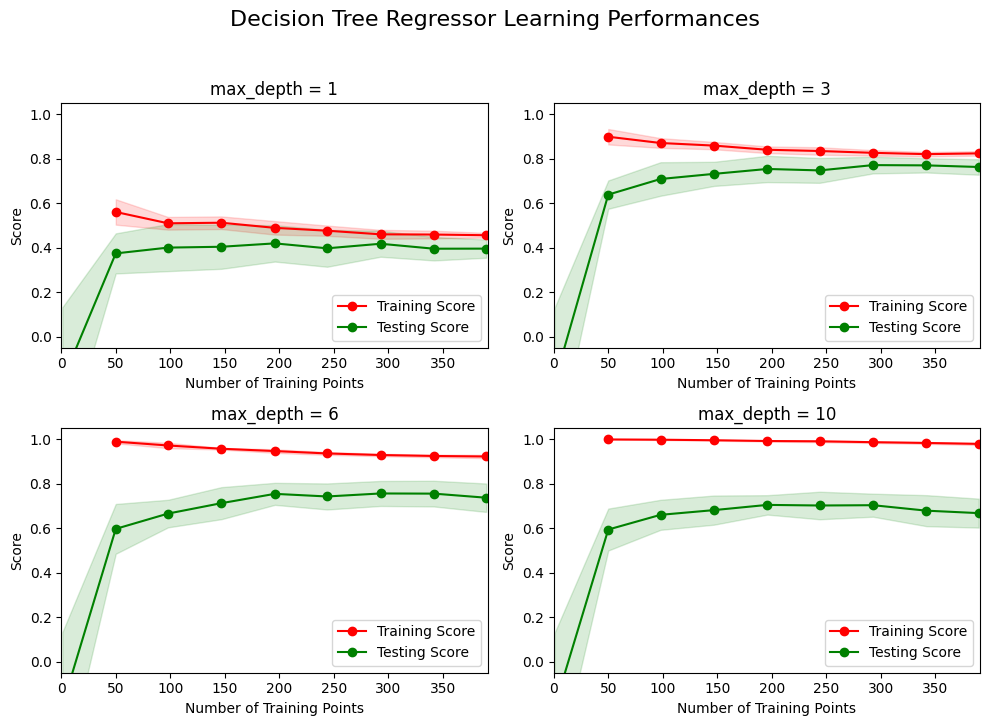

In [76]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(features, prices)

## **Question 4 - Learning the Data**
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

##   **Answers to the Questions:**

- I'll choose the graph with **max_depth = 3** .
-----
- **Training Curve**: As more training points are added, the training score decreases slightly and then stabilizes. 
- **Testing Curve**: The testing score improves as more training points are added, indicating that the model's generalization performance improves with more data.
----- 
- **In this case**: Beyond a certain number of training points, adding more data does not provide significant benefits, as both the training and testing scores have stabilized.
- **In general**: Adding more training points can benefit the model **if the dataset is not sufficiently large or if the model is underfitting the data**. However, when the model's learning saturates, the gains from additional data diminish.

## Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves. one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

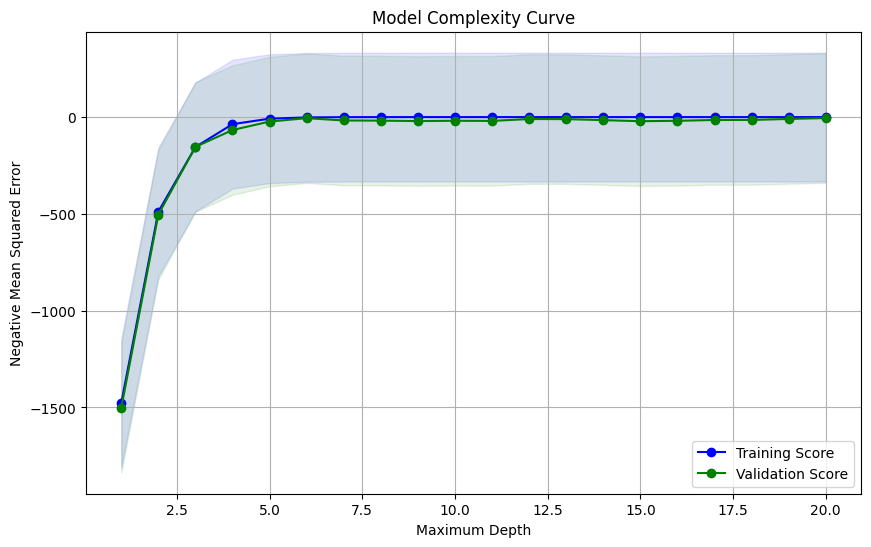

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve, train_test_split

# Hypothetical performance metric
def performance_metric(y_true, y_pred):
    from sklearn.metrics import mean_squared_error
    return -mean_squared_error(y_true, y_pred)

# Generate Complexity Curves
def plot_complexity_curves(X, y):
    train_scores = []
    validation_scores = []
    depths = range(1, 21)

    for depth in depths:
        train_score_list = [] 
        val_score_list = []
        
        for _ in range(10):  # For uncertainty (random trials)
            # Split the data
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
            
            # Train the model
            model = DecisionTreeRegressor(max_depth=depth)
            model.fit(X_train, y_train)
            
            # Compute scores
            train_score_list.append(performance_metric(y_train, model.predict(X_train)))
            val_score_list.append(performance_metric(y_val, model.predict(X_val)))
        
        # Average scores and append
        train_scores.append(np.mean(train_score_list))
        validation_scores.append(np.mean(val_score_list))

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(depths, train_scores, label="Training Score", color="blue", marker="o")
    plt.plot(depths, validation_scores, label="Validation Score", color="green", marker="o")
    
    # Add shaded region for uncertainty
    plt.fill_between(depths, np.array(train_scores) - np.std(train_scores),
                     np.array(train_scores) + np.std(train_scores), color="blue", alpha=0.1)
    plt.fill_between(depths, np.array(validation_scores) - np.std(validation_scores),
                     np.array(validation_scores) + np.std(validation_scores), color="green", alpha=0.1)
    
    plt.title("Model Complexity Curve")
    plt.xlabel("Maximum Depth")
    plt.ylabel("Negative Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()

# Sample Dataset (replace with your dataset)
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=1, noise=0.2, random_state=42)

# Plot the complexity curves
plot_complexity_curves(X, y)

### **Question 5 - Bias-Variance Tradeoff**
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

-----
### **1. Maximum Depth = 1**
  - The model suffers from **high bias(Underfitting)**.
  
- **Reasoning**:
  - At `max_depth = 1`, the decision tree is extremely **simple** and cannot capture the underlying patterns in the data. This leads to both **low training performance** and **low validation performance**.

- **Visual Cues**:
  - In the complexity curve, you will observe:
    - **Low training score**: Indicates the model cannot even fit the training data.
    - **Low validation score**: Shows that the model generalizes poorly, as it is underfitting.

------

### **2. Maximum Depth = 10**
  - The model suffers from **high variance (OverFitting)**.
  
- **Reasoning**:
  - At `max_depth = 10`, the decision tree becomes highly complex and begins to **overfit** the training data.
  - This results in a large gap between the training and validation scores.

- **Visual Cues**:
  - In the complexity curve, you will observe:
    - **High training score**: The model fits the training data very well.
    - **Low validation score**: The model struggles to generalize to new data.
    - **Wide gap** between the training and validation scores is a key indicator of overfitting (high variance).


### Summary Table:

| **Max Depth** | **Bias or Variance Problem** | **Training Score** | **Validation Score** | **Visual Cues** |
|---------------|-----------------------------|--------------------|----------------------|------------------|
| **1**         | High Bias (Underfitting)    | Low                | Low                  | Both curves are flat and low. |
| **10**        | High Variance (Overfitting) | High               | Low                  | Large gap between training and validation curves. |


---
### ` Question 6 - Best-Guess Optimal Model `
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

### **Answer:**
- Based on the Model Complexity Curve,` a maximum depth of 4` appears to result in a model that best generalizes to unseen data.
- `Training` and Validation Scores: At lower depths, the training score improves rapidly, but the validation score also increases, indicating that the model is fitting the training data well but not generalizing well to unseen data. `Overfitting`: As the depth increases beyond 4, the training score continues to improve, but the validation score starts to plateau or even decrease.

-----

## `Evaluating Model Performance`
In this **final section** of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### **`Question 7 - Cross-Validation`**

**What is the `k-Fold Cross-Validation` Training Technique?**

   - Definition: **k-fold cross-validation** is a `resampling technique` used to evaluate a model's performance by splitting the dataset into k equal-sized parts. The model is trained and tested k times, ensuring each data point is used for validation exactly once.

   - **How It Works:**
      - The dataset is divided into k subsets (folds) of approximately equal size.
      - The model is trained k times. In each iteration:
      - One fold is used as the validation set.
      - The remaining k-1 folds are combined to form the training set.
      - The **final performance metric** is the `average score` across all k iterations.

#### **What Benefit Does k-Fold Cross-Validation Provide for Grid Search?**

- `More Reliable Evaluation`:k-fold cross-validation ensures that every data point is used for both training and testing, giving a more robust estimate of the model's true performance.

- `Reduces Bias in Validation`:Without cross-validation, grid search might produce hyperparameters that are optimal for a single train-test split but fail to generalize well.

- `Improves Generalization`:k-fold cross-validation avoids overfitting to a particular training/validation split, ensuring that the selected hyperparameters work well across different subsets of the data.

#### `Implementation: Fitting a Model`

Best Parameters: {'max_depth': np.int64(10)}
Overall Mean Squared Error: 0.002110900624107567


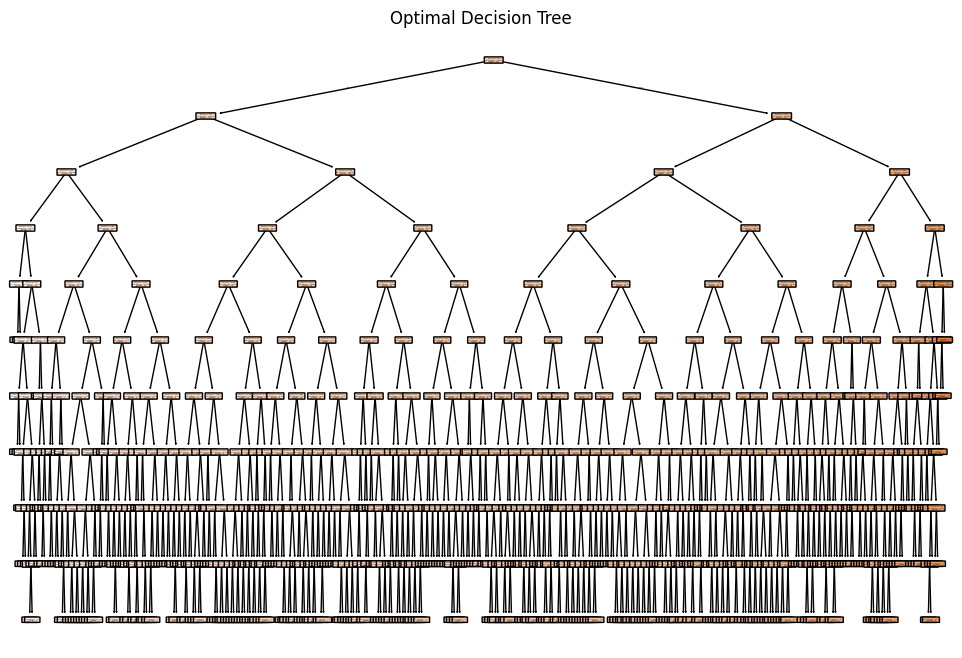

In [78]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the Decision Tree model
model = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for 'max_depth'
param_grid = {'max_depth': np.arange(1, 11)}  # Try depths from 1 to 10

# Set up ShuffleSplit cross-validation
cv_sets = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Set up GridSearchCV with ShuffleSplit
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_sets, scoring='neg_mean_squared_error')

# Train the model using grid search
grid_search.fit(X, y)

# Retrieve the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the full dataset (optional test set evaluation)
y_pred = best_model.predict(X)
overall_mse = mean_squared_error(y, y_pred)

# Print results
print("Best Parameters:", best_params)
print("Overall Mean Squared Error:", overall_mse)

# Optional: Visualize the best decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=["Feature"], rounded=True)
plt.title("Optimal Decision Tree")
plt.show()


In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def performance_metric(y_true, y_pred):
    """Calculate and return the performance metric (R^2 score)."""
    from sklearn.metrics import r2_score
    return r2_score(y_true, y_pred)

def fit_model(X, y):
    """
    Performs grid search over the 'max_depth' parameter for a decision tree regressor.
    """
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=42)

    # Create a dictionary for the 'max_depth' parameter with values from 1 to 10
    params = {'max_depth': range(1, 11)}

    # Create a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric)

    # Create a GridSearchCV object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting
    return grid.best_estimator_


In [80]:
# Generate a sample dataset (replace with your own dataset)
from sklearn.datasets import make_regression
# Fit the model and get the optimal decision tree regressor
optimal_model = fit_model(X, y)

# Display the optimal 'max_depth'
print("Optimal max_depth:", optimal_model.get_params()['max_depth'])


Optimal max_depth: 10


### **Question 9 - Optimal Model**

* What maximum depth does the optimal model have? 

#### Maximum depth optimal model have is 10 


In [81]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

#### Predicted Price Estimate (Illustrative Values):
| Client   | Prediction Logic                                                                                                | Estimated Price |
|----------|-----------------------------------------------------------------------------------------------------------------|-----------------|
| Client 1 | Moderate rooms, mid-level poverty, and decent student-teacher ratio suggest a mid-range price.                  | \$400,000       |
| Client 2 | Fewer rooms, high poverty level, and higher student-teacher ratio suggest a lower price.                        | \$200,000       |
| Client 3 | Many rooms, very low poverty, and excellent student-teacher ratio suggest a higher price.                       | \$900,000       |

---

In [82]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $411,417.39
Predicted selling price for Client 2's home: $230,828.57
Predicted selling price for Client 3's home: $937,230.00


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
